In [1]:
import numpy as np
from copy import deepcopy
import dionysus as d
import scipy
import pandas as pd
import gudhi as gd
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt


from Laplacian_Functions import *
from Ren_Functions import *

In [2]:
3%4

3

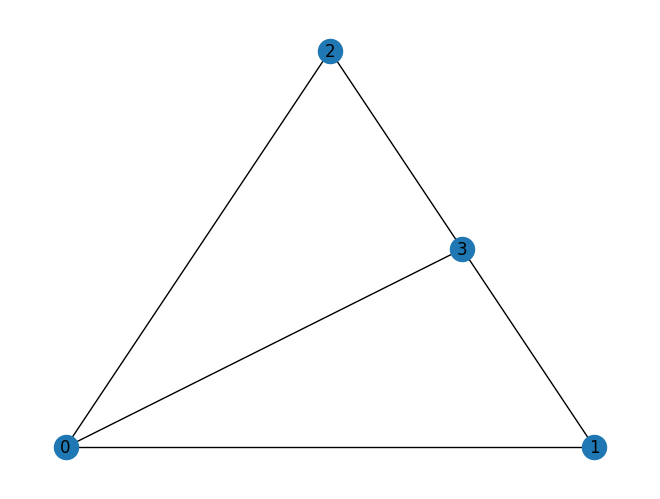

In [3]:
def create_cycle(n, overlap = 0, start_n=0, overlap_start = 0):
    simplices = []
    for v_i in range(n):
        if v_i < overlap:
            simplices.append(([v_i+overlap_start], 0))
            if v_i + 1 == overlap:
                simplices.append(([v_i+overlap_start, start_n], 1))
            else:
                simplices.append(([v_i+overlap_start, v_i+overlap_start+1], 1))
        elif v_i < n-1:
            simplices.append(([v_i+start_n-overlap], 0))
            simplices.append(([v_i+start_n-overlap, v_i+1+start_n-overlap], 1))
        else:
            simplices.append(([v_i+start_n-overlap], 0))
            # If you started with overlap, go to overlap_start. Otherwise go to start_n.
            simplices.append(([v_i+start_n-overlap, start_n*(overlap==0)+overlap_start*(overlap > 0)], 1))
    return simplices
    

# Drawn
simplices = [([0], 0), ([1], 1), ([2], 2), ([3], 3), ([1,0], 4), ([0,3], 5), ([1,3], 6), ([2,3], 7), ([0,2], 8), ([0,1,3], 9)]#, ([0,2,3], 10)]
# simplices = [([0], 0), ([1], 1), ([2], 2), ([3], 3), ([1,0], 4), ([0,3], 8), ([1,3], 10), ([2,3], 10.1), ([0,2], 12), ([0,1,3], 12.5)]

# Ren paper
# simplices = [([0], 0), ([1], 0), ([2], 0), ([3], 0), ([0,2], 1), ([0,3], 1), ([2,3], 1), ([0,1], 2), ([0,2,3], 3)]

# Drawn new
# simplices = [([0], 0), ([1], 0), ([2], 0), ([3], 1), ([0,1], 2), ([1,2], 2), ([2,3], 2), ([0,2], 3), ([0,3], 3), ([4], 4), ([2,4], 5), ([3,4], 5), ([0,1,2], 6), ([2,3,4], 7)]#, ([0,2,3], 8)]

# Test easy
# simplices = [([0], 0), ([1], 0), ([2], 0), ([0,1], 0), ([0,2], 0), ([1,2], 0),
#              ([3], 1), ([2,3], 1), ([1,3], 1), ([0,1,2], 1), ([1,2,3], 1)]

# Test hard
# simplices = [([0], 0), ([1], 0), ([2], 0), ([3], 0), ([0,1], 0), ([0,2], 0), ([1,3], 0), ([2,3], 0),
#               ([1,2], 1),  ([0,1,2], 1), ([1,2,3], 1)]

# Cycles
x = 4
y = 4
z = 4
x4 = 5
overlap = 3
# Three cycles added in order x->y->z, with x and z not connected.
# simplices = create_cycle(x) + create_cycle(y, start_n=x, overlap=overlap, overlap_start=x-overlap) + create_cycle(z, start_n=x+y-overlap, overlap=overlap, overlap_start=x+y-2*overlap)
# Three cycles added with all of them connecting on overlap vertices.
# simplices = create_cycle(x) + create_cycle(y, start_n=x, overlap=overlap) + create_cycle(z, start_n=x+y-overlap, overlap=overlap)
# simplices = create_cycle(x) + create_cycle(y, start_n=x, overlap=overlap) + create_cycle(z, start_n=x+y-overlap, overlap=overlap)+ create_cycle(x4, start_n=x+y+z-2*overlap, overlap=overlap)
# simplices.append(([7], 0))
# simplices.append(([6,7], 1))
# simplices = create_cycle(7)
# simplices.append(([10], 2))
# simplices.append(([0,2], 2))
# simplices.append(([0,1,2], 2))
# simplices.append(([0,3], 3))
# simplices.append(([0,2,3], 3))
# print(simplices)

f = d.Filtration()
for vertices, time in simplices:
    f.append(d.Simplex(vertices, time))

# Drawing graph
G = nx.Graph()
f.sort()
for s in f:
    if s.dimension() == 0:
        G.add_node(s[0])
    elif s.dimension() == 1:
        G.add_edge(s[0], s[1])
nx.draw_planar(G, with_labels=True)

In [4]:
p = d.cohomology_persistence(f, 47, True)
dgms = d.init_diagrams(p, f)    
barcodes = [[(p.birth, p.death) for p in dgms[q]] for q in range(len(dgms))]
for k in zip(*barcodes[0]):
    print(k)


(0.0, 1.0, 2.0, 3.0)
(inf, 4.0, 7.0, 5.0)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

/home/siroj/code/Master_thesis/code/Laplacian_Functions.py:609: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


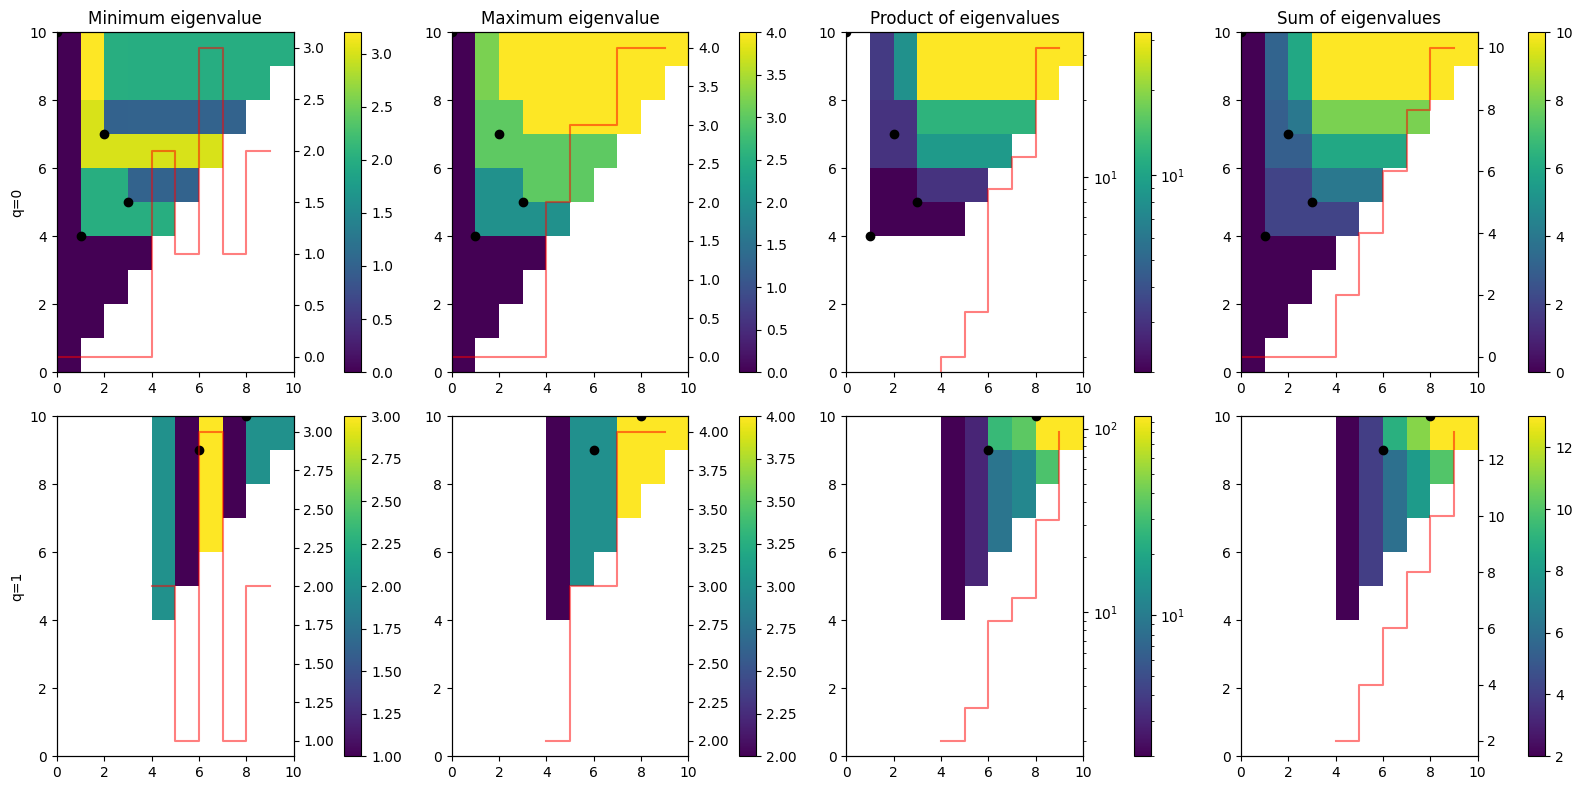

In [5]:
eigenvalues, relevant_times, fig, ax = plot_persistent_Laplacian_eigenvalues(f, lambda x: 1)

In [7]:
def weight_fun(x):
    v = x.split(",")
    p = 1
    # if "2" in v:
    #     return 2
    # if "0" in v:
    #     p *= 2#**(len(v)/2)
    # if "3" in v:
    #     p *= 3#**(len(v)/2)
    return p


Lap = compute_Laplacian(f, 1, 4, 4, weight_fun, verb=True)
print("Lap:\n", Lap)
eval, evec = np.linalg.eig(Lap)
for i in range(len(eval)):
    print(f"eval: {np.round(eval[i], 2)}, evec: {np.round(evec[:,i]/np.min(np.abs(evec[:,i][np.abs(evec[:,i]) > 1e-8])),2)}", )

upL:
 [[0.]]
eval: 0.0, evec: [1.]
Product of eigenvalues: 1

downL:
 [[2.]]
eval: 2.0, evec: [1.]
Product of eigenvalues: 2.0

Lap:
 [[2.]]
eval: 2.0, evec: [1.]


In [32]:
B12 = np.array([[-1,-1,0,0],
        [1,0,-1,0],
        [0,0,0,-1]])
B22 = np.array([[0,1,1,1]])
print(B12)
print(np.eye(4)-np.linalg.pinv(B22)@B22)
B12@(np.eye(4)-np.linalg.pinv(B22)@B22)@B12.T
# np.round(np.linalg.pinv(,
#                          [0,1,1,1]]))@np.array([[-1,-1,0,0],
#                          [1,0,-1,0],
#                          [0,0,0,-1],
#                          [0,1,1,1]]), 2)

[[-1 -1  0  0]
 [ 1  0 -1  0]
 [ 0  0  0 -1]]
[[ 1.          0.          0.          0.        ]
 [ 0.          0.66666667 -0.33333333 -0.33333333]
 [ 0.         -0.33333333  0.66666667 -0.33333333]
 [ 0.         -0.33333333 -0.33333333  0.66666667]]


array([[ 1.66666667, -1.33333333, -0.33333333],
       [-1.33333333,  1.66666667, -0.33333333],
       [-0.33333333, -0.33333333,  0.66666667]])

In [41]:
A = np.array([[2,-1.5,-0.5],
          [-1.5, 1.5, 0],
          [-0.5, 0, 0.5]])
eig_val, eig_vec = np.linalg.eig(A)
eig_val, eig_vec

(array([ 3.32287566e+00, -8.31872381e-19,  6.77124344e-01]),
 array([[-0.76505532,  0.57735027, -0.28523152],
        [ 0.6295454 ,  0.57735027, -0.51994159],
        [ 0.13550992,  0.57735027,  0.8051731 ]]))

In [43]:
eig_val[0]+eig_val[2]

4.000000000000002

In [34]:
import scipy.linalg as sl

ns = sl.null_space(B22)
print("null space:", ns)
C = B12@ns
C@C.T

null space: [[-0.57735027 -0.57735027 -0.57735027]
 [ 0.66666667 -0.33333333 -0.33333333]
 [-0.33333333  0.66666667 -0.33333333]
 [-0.33333333 -0.33333333  0.66666667]]


array([[ 1.66666667, -1.33333333, -0.33333333],
       [-1.33333333,  1.66666667, -0.33333333],
       [-0.33333333, -0.33333333,  0.66666667]])

In [46]:
sqrt_2 = np.sqrt(2)
sqrt_6 = np.sqrt(6)
my_ns = np.array([[1,0,0],
                  [0,-1/sqrt_6, -1/sqrt_2],
                  [0,2/sqrt_6, 0],
                  [0,-1/sqrt_6,1/sqrt_2]])
print(my_ns)
my_C = B12@my_ns
my_C@my_C.T

[[ 1.          0.          0.        ]
 [ 0.         -0.40824829 -0.70710678]
 [ 0.          0.81649658  0.        ]
 [ 0.         -0.40824829  0.70710678]]


array([[ 1.66666667, -1.33333333, -0.33333333],
       [-1.33333333,  1.66666667, -0.33333333],
       [-0.33333333, -0.33333333,  0.66666667]])

In [25]:
svd = np.linalg.svd(B22)
B12@svd.Vh

array([[ 0.57735027, -0.0893164 , -0.9106836 ,  0.9106836 ],
       [ 0.57735027, -0.24401694,  1.24401694, -0.24401694],
       [ 0.57735027,  0.33333333, -0.33333333, -0.66666667]])

In [4]:
compute_Laplacian(f, 0, 3, 5, lambda x: 1)

array([[ 2., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [-1.,  0., -1.,  4., -1.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,  4., -1.,  0.,  0.,
        -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 

In [33]:
def weight_fun(x):
    if "1" in x:
        return 1
    return 1


barcodes_df = complete_analysis_fast(f, weight_fun)
# print(np.round(barcodes_df.loc[2, "p_ij"], 2))
barcodes_df.apply(lambda x: x.apply(lambda y: np.round(y, 2) if y is not None else None).apply(lambda y: np.sort(y) if type(y) == np.ndarray else y), axis=1).groupby("q").apply(display, include_groups=False)


,birth,death,multiplicity,eigenvalues_ijm1,eigenvalues_ij,eigenvalues_im1jm1,eigenvalues_im1j,p_ijm1,p_ij,p_im1jm1,p_im1j
0,0.0,1.0,7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.0, 0.64, 1.53, 2.0, 2.5, 3.5, 4.47, 5.36]",[],[],1,408.0,1,1
1,0.0,inf,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.0, 0.64, 1.53, 2.0, 2.5, 3.5, 4.47, 5.36]",[],[],1,408.0,1,1


,birth,death,multiplicity,eigenvalues_ijm1,eigenvalues_ij,eigenvalues_im1jm1,eigenvalues_im1j,p_ijm1,p_ij,p_im1jm1,p_im1j
2,1.0,inf,3,[],"[-0.0, -0.0, 0.0, 0.64, 1.53, 2.0, 2.5, 3.5, 4...",[],[],1,408.0,1,1


""


[[ 2.  1. -1.  0.  0.  0.]
 [ 1.  2.  0.  0.  0.  1.]
 [-1.  0.  2. -1.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  1.  0.  0. -1.  2.]]
[-1.11022302e-16  1.00000000e+00  4.00000000e+00  3.00000000e+00
  1.00000000e+00  3.00000000e+00]
<0> 0 - <1> 0 - <2> 0 - <3> 0 - <4> 0 - <5> 0 - <0,1> 1 - <0,5> 1 - <1,2> 1 - <2,3> 1 - <3,4> 1 - <4,5> 1 - 

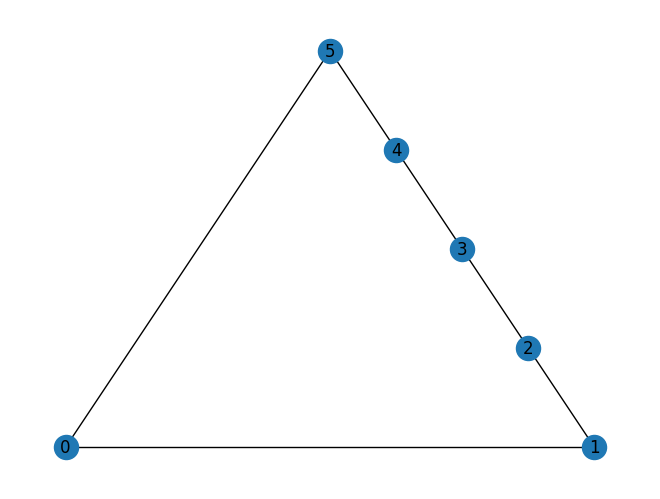

In [188]:
x=6
simplices = create_cycle(x)
f = d.Filtration()
for vertices, time in simplices:
    f.append(d.Simplex(vertices, time))

Lap = compute_Laplacian(f, 1, 1, 1, lambda x: 1)
print(Lap)
print(np.linalg.eig(Lap)[0])
G = nx.Graph()
f.sort()
for s in f:
    print(s, end=" - ")
    if s.dimension() == 0:
        G.add_node(s[0])
    elif s.dimension() == 1:
        G.add_edge(s[0], s[1])
nx.draw_planar(G, with_labels=True)

In [185]:
# A = np.array([[2,-1,0,0,-1],
#               [-1,2,-1,0,0],
#               [0,-1,2,-1,0],
#               [0,0,-1,2,-1],
#               [-1,0,0,-1,2]])
A = np.array([[2,-1,0,-1],
              [-1,2,-1,0],
              [0,-1,2,-1],
              [-1,0,-1,2]])
np.linalg.eig(A)

EigResult(eigenvalues=array([-6.66133815e-16,  2.00000000e+00,  4.00000000e+00,  2.00000000e+00]), eigenvectors=array([[ 5.00000000e-01,  7.07106781e-01, -5.00000000e-01,
         5.55111512e-17],
       [ 5.00000000e-01, -2.74466000e-16,  5.00000000e-01,
        -7.07106781e-01],
       [ 5.00000000e-01, -7.07106781e-01, -5.00000000e-01,
         2.58507341e-16],
       [ 5.00000000e-01,  3.08103393e-17,  5.00000000e-01,
         7.07106781e-01]]))

In [ ]:
n=4


1.9999999999999996

In [168]:
import sklearn
import sklearn.linear_model
overlap = 4

results = {}
results_np = []
amount_good = 0

for z in range(2*overlap+2, 10+2*overlap):
    results[z] = {}
    for x in range(2*overlap+2, 10+2*overlap):
        results[z][x] = {}
        for y in range(2*overlap+2, 10+2*overlap):
            # Three cycles added in order x->y->z, with x and z not connected.
            # simplices = create_cycle(x) + create_cycle(y, start_n=x, overlap=overlap, overlap_start=x-overlap) + create_cycle(z, start_n=x+y-overlap, overlap=overlap, overlap_start=x+y-2*overlap)
            # Three cycles added with all of them connecting on overlap vertices.
            simplices = create_cycle(x) + create_cycle(y, start_n=x, overlap=overlap) + create_cycle(z, start_n=x+y-overlap, overlap=overlap)
            f = d.Filtration()
            for vertices, time in simplices:
                f.append(d.Simplex(vertices, time))
            Lap = compute_Laplacian(f, 1, 1, 1, lambda x: 1)
            positive_evals = [i for i in np.linalg.eig(Lap)[0] if i > 1e-8]
            res = 1
            for eval in positive_evals:
                res *= eval
            res = res.real
            # barcodes_df = complete_analysis_fast(f, weight_fun)
            # res = (np.round(barcodes_df.loc[2, "p_ij"], 2)).real
            results[z][x][y] = (res)
            results_np.append([x**2*y*z, x*y**2*z, x*y*z**2, x*y*z, x**2, y**2, z**2, x*y, x*z, y*z, x,y,z,res])
    # print(f"z={z}")
    # display(pd.DataFrame(results[z]))
results_np = np.array(results_np)
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(results_np[:, :-1], results_np[:, -1])
print(f"Coefficients: {np.round(linear_model.coef_, 2)}, intercept: {linear_model.intercept_}")
print("Certainty:",linear_model.score(results_np[:, :-1], results_np[:, -1]))

Coefficients: [  1.   1.   1.  -8.  -9.  -9.  -9. -18. -18. -18. 126. 126. 126.], intercept: -432.0000000551663
Certainty: 1.0


In [170]:
overlap = 321

results_np = []
results = {}

for x in range(overlap+1, overlap+7):
    results[x] = {}
    for y in range(overlap+1, overlap+7):
        simplices = create_cycle(x) + create_cycle(y, start_n=x, overlap=overlap)

        f = d.Filtration()
        for vertices, time in simplices:
            f.append(d.Simplex(vertices, time))

        Lap = compute_Laplacian(f, 1, 1, 1, lambda x: 1)
        positive_evals = [i for i in np.linalg.eig(Lap)[0] if i > 1e-8]
        res = 1
        for eval in positive_evals:
            res *= eval
        res = res.real
        results[x][y] = (res)
        results_np.append([x**2*y, x*y**2, x*y, x, y ,res])
# display(pd.DataFrame(results))
results_np = np.array(results_np)
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(results_np[:, :-1], results_np[:, -1])
print(f"Coefficients: {linear_model.coef_}, intercept: {linear_model.intercept_}")
print("Certainty:",linear_model.score(results_np[:, :-1], results_np[:, -1]))

Coefficients: [ 9.99999999e-01  1.00000000e+00 -3.20999999e+02 -1.02400000e+05
 -1.02400000e+05], intercept: 32870399.972475786
Certainty: 1.0


In [169]:
import sklearn
import sklearn.linear_model
overlap = 7

results_np = []
amount_good = 0


for x in range(2*overlap+2, 7+2*overlap):
    for y in range(2*overlap+2, 7+2*overlap):
        for z in range(2*overlap+2, 7+2*overlap):
            for x4 in range(2*overlap+2, 7+2*overlap):
                # Three cycles added in order x->y->z, with x and z not connected.
                # simplices = create_cycle(x) + create_cycle(y, start_n=x, overlap=overlap, overlap_start=x-overlap) + create_cycle(z, start_n=x+y-overlap, overlap=overlap, overlap_start=x+y-2*overlap)
                # Three cycles added with all of them connecting on overlap vertices.
                simplices = create_cycle(x) + create_cycle(y, start_n=x, overlap=overlap) + create_cycle(z, start_n=x+y-overlap, overlap=overlap)+ create_cycle(x4, start_n=x+y+z-2*overlap, overlap=overlap)
                f = d.Filtration()
                for vertices, time in simplices:
                    f.append(d.Simplex(vertices, time))
                
                Lap = compute_Laplacian(f, 1, 1, 1, lambda x: 1)
                positive_evals = [i for i in np.linalg.eig(Lap)[0] if i > 1e-8]
                res = 1
                for eval in positive_evals:
                    res *= eval
                res = res.real

                results_np.append([x**2*y*z*x4, x*y**2*z*x4, x*y*z**2*x4, x*y*z*x4**2, 
                                   x*y*z*x4, 
                                   x*y*z, x*y*x4, x*z*x4, y*z*x4, x**2*y, x**2*z, x**2*x4, y**2*x, y**2*z, y**2*x4, z**2*x, z**2*y, z**2*x4, x4**2*x, x4**2*y, x4**2*z,
                                    x**2, y**2, z**2, x4**2, x*y, x*z, x*x4, y*z, y*x4, z*x4, x, y, z, x4, res])
    # print(f"z={z}")
    # display(pd.DataFrame(results[z]))
results_np = np.array(results_np)
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(results_np[:, :-1], results_np[:, -1])
coefs = np.round(linear_model.coef_, 2)
print(f"Coefficients: {coefs[:4]}\n{coefs[4:5]}\n{coefs[5:21]}\n{coefs[21:]}\n, intercept: {np.round(linear_model.intercept_, 2)}")
print("Certainty:",linear_model.score(results_np[:, :-1], results_np[:, -1]))

Coefficients: [1. 1. 1. 1.]
[-21.]
[-108. -108. -108. -108.  -36.  -36.  -36.  -36.  -36.  -36.  -36.  -36.
  -36.  -36.  -36.  -36.]
[   432.    432.    432.    432.   1620.   1620.   1620.   1620.   1620.
   1620. -12960. -12960. -12960. -12960.]
, intercept: 81648.0
Certainty: 1.0


In [93]:
320**3+320**2

32870400

In [28]:
def weight_fun(x):
    v = x.split(",")
    if "2" in v:
        return 2#**(len(v)/2)
    return 1

barcodes_df = complete_analysis_fast(f, weight_fun)
barcodes_df.apply(lambda x: x.apply(lambda y: np.round(y, 2) if y is not None else None).apply(lambda y: np.sort(y) if type(y) == np.ndarray else y), axis=1).groupby("q").apply(display, include_groups=False)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

,birth,death,multiplicity,eigenvalues_ijm1,eigenvalues_ij,eigenvalues_im1jm1,eigenvalues_im1j,p_ijm1,p_ij,p_im1jm1,p_im1j
0,1.0,4.0,1,"[0.0, 0.0]","[0.0, 2.0]",[0.0],[0.0],1.0,2.0,1.0,1.0
1,3.0,5.0,1,"[0.0, 0.0, 0.0, 2.0]","[-0.0, 0.0, 1.0, 3.0]","[0.0, 0.0, 2.0]","[0.0, 0.0, 2.0]",2.0,3.0,2.0,2.0
2,2.0,7.0,1,"[-0.0, 0.0, 3.0]","[0.0, 1.0, 3.0]","[-0.0, 3.0]","[0.0, 3.0]",3.0,3.0,3.0,3.0
3,0.0,inf,1,[0.0],[0.0],[],[],1.0,1.0,1.0,1.0


,birth,death,multiplicity,eigenvalues_ijm1,eigenvalues_ij,eigenvalues_im1jm1,eigenvalues_im1j,p_ijm1,p_ij,p_im1jm1,p_im1j
4,6.0,9.0,1,"[-0.0, 3.0, 3.0]","[3.0, 3.0, 3.0]","[1.0, 3.0]","[1.0, 3.0]",9.0,27.0,3.0,3.0
5,8.0,inf,1,"[0.0, -0.0, 2.0, 7.0, 7.0]","[-0.0, 2.0, 3.0, 7.0, 7.0]","[-0.0, 1.0, 3.0, 7.0]","[1.0, 3.0, 3.0, 7.0]",98.0,294.0,21.0,63.0


""


In [6]:
def weight_fun(x):
    return 1

barcodes_df = complete_analysis_fast(f, weight_fun)
barcodes_df.apply(lambda x: x.apply(lambda y: np.round(y, 2) if y is not None else None).apply(lambda y: np.sort(y) if type(y) == np.ndarray else y), axis=1).groupby("q").apply(display, include_groups=False)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

,birth,death,multiplicity,eigenvalues_ijm1,eigenvalues_ij,eigenvalues_im1jm1,eigenvalues_im1j,p_ijm1,p_ij,p_im1jm1,p_im1j
0,1.0,4.0,1,"[0.0, 0.0]","[0.0, 2.0]",[0.0],[0.0],1.0,2.0,1.0,1.0
1,3.0,5.0,1,"[0.0, 0.0, 0.0, 2.0]","[-0.0, 0.0, 1.0, 3.0]","[0.0, 0.0, 2.0]","[0.0, 0.0, 2.0]",2.0,3.0,2.0,2.0
2,2.0,7.0,1,"[-0.0, 0.0, 3.0]","[0.0, 1.0, 3.0]","[-0.0, 3.0]","[-0.0, 3.0]",3.0,3.0,3.0,3.0
3,0.0,inf,1,[0.0],[0.0],[],[],1.0,1.0,1.0,1.0


,birth,death,multiplicity,eigenvalues_ijm1,eigenvalues_ij,eigenvalues_im1jm1,eigenvalues_im1j,p_ijm1,p_ij,p_im1jm1,p_im1j
4,6.0,9.0,1,"[-0.0, 3.0, 3.0]","[3.0, 3.0, 3.0]","[1.0, 3.0]","[1.0, 3.0]",9.0,27.0,3.0,3.0
5,8.0,inf,1,"[0.0, -0.0, 2.0, 4.0, 4.0]","[-0.0, 2.0, 3.0, 4.0, 4.0]","[-0.0, 1.0, 3.0, 4.0]","[1.0, 3.0, 3.0, 4.0]",32.0,96.0,12.0,36.0


""


In [7]:
def weight_fun(x):
    # v = x.split(',')
    # if v != "2" and "2" in v: #and len(v) >= 2:
    #     return 2 ** len(v)
    if "2" in x:
        return 2
    # if x in ["0,1,3"]:
    #     return 3
    return 1

ren_df = complete_analysis_Ren_fast(f, weight_fun)
ren_df

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

,q,birth,death,multiplicity,torsion_ijm1,torsion_ij,torsion_im1jm1,torsion_im1j,Weight
0,0,0.0,inf,1,None,[],None,[],[]
1,0,1.0,4.0,1,[],[],[],[],[]
2,0,2.0,7.0,1,[],[],[],[],[]
3,0,3.0,5.0,1,[],[],[],[],[]
4,1,6.0,9.0,1,[],[],[],[],[]
5,1,8.0,inf,1,None,[],None,[],[]


In [ ]:
f.sort()
p = d.cohomology_persistence(f, 47, True)
dgms = d.init_diagrams(p, f)
for q in range(len(dgms)):
    for point in dgms[q]:
        


In [5]:
def list_minus(x, y):
    counter_x = Counter(x)
    counter_y = Counter(y)

    c_xmy = counter_x - counter_y
    return list(c_xmy.elements())

ren_df.apply(lambda x: help_f(help_f(x["torsion_ij"], x["torsion_ijm1"]), help_f(x["torsion_im1j"], x["torsion_im1jm1"])), axis=1)

0    [2.0]
1       []
2       []
3       []
4       []
5       []
dtype: object

In [37]:


def weight_fun(x):
    return 1


barcodes_df = complete_analysis_fast(f, weight_fun)
barcodes_df.apply(lambda x: x.apply(lambda y: np.round(y, 2) if y is not None else None).apply(lambda y: np.sort(y) if type(y) == np.ndarray else y), axis=1).groupby("q").apply(display, include_groups=False)


# barcodes_p_df.apply(lambda x: x.apply(lambda y: np.round(y, 2) if y is not None else None), axis=1).groupby("q").apply(display)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

,birth,death,multiplicity,eigenvalues_ijm1,eigenvalues_ij,eigenvalues_im1jm1,eigenvalues_im1j,p_ijm1,p_ij,p_im1jm1,p_im1j
0,1.0,4.0,1,"[0.0, 0.0]","[0.0, 2.0]",[0.0],[0.0],1.0,2.0,1.0,1.0
1,3.0,5.0,1,"[0.0, 0.0, 0.0, 2.0]","[-0.0, 0.0, 1.0, 3.0]","[0.0, 0.0, 2.0]","[0.0, 0.0, 2.0]",2.0,3.0,2.0,2.0
2,2.0,7.0,1,"[-0.0, 0.0, 3.0]","[0.0, 1.0, 3.0]","[-0.0, 3.0]","[-0.0, 3.0]",3.0,3.0,3.0,3.0
3,0.0,inf,1,[0.0],[0.0],[],[],1.0,1.0,1.0,1.0


,birth,death,multiplicity,eigenvalues_ijm1,eigenvalues_ij,eigenvalues_im1jm1,eigenvalues_im1j,p_ijm1,p_ij,p_im1jm1,p_im1j
4,6.0,9.0,1,"[-0.0, 3.0, 3.0]","[3.0, 3.0, 3.0]","[1.0, 3.0]","[1.0, 3.0]",9.0,27.0,3.0,3.0
5,8.0,10.0,1,"[-0.0, 2.0, 3.0, 4.0, 4.0]","[2.0, 2.0, 4.0, 4.0, 4.0]","[1.0, 3.0, 3.0, 4.0]","[1.0, 3.0, 3.0, 4.0]",96.0,256.0,36.0,36.0


""


In [39]:
def weight_fun(x):
    # v = x.split(',')
    # if v != "2" and "2" in v and len(v) >= 2:
    #     return 2
    if x in ["0,2,3"]:
        return 3
    # if x in ["0,2,3"]:
    #     return 2
    return 1

barcodes_df = complete_analysis_fast(f, weight_fun, max_dim=2)
barcodes_df.apply(lambda x: x.apply(lambda y: np.round(y, 3) if y is not None else None).apply(lambda y: np.sort(y) if type(y) == np.ndarray else y), axis=1).groupby("q").apply(display, include_groups=False)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

,birth,death,multiplicity,eigenvalues_ijm1,eigenvalues_ij,eigenvalues_im1jm1,eigenvalues_im1j,p_ijm1,p_ij,p_im1jm1,p_im1j
0,0.0,1.0,2,"[0.0, 0.0, 0.0, 0.0]","[-0.0, 0.0, 3.0, 3.0]",[],[],1.0,9.0,1,1
1,0.0,2.0,1,"[-0.0, 0.0, 3.0, 3.0]","[0.0, 1.0, 3.0, 4.0]",[],[],9.0,12.0,1,1
2,0.0,inf,1,"[0.0, 1.0, 3.0, 4.0]","[0.0, 1.0, 3.0, 4.0]",[],[],12.0,12.0,1,1


,birth,death,multiplicity,eigenvalues_ijm1,eigenvalues_ij,eigenvalues_im1jm1,eigenvalues_im1j,p_ijm1,p_ij,p_im1jm1,p_im1j
3,1.0,3.0,1,"[-0.0, 3.0, 3.0]","[3.0, 3.0, 27.0]",[],[],9.0,243.0,1,1


""


In [41]:
def id_fun(x):
    return 1

def weight_fun(x):
    # v = x.split(',')
    # if v != "2" and "2" in v and len(v) >= 2:
    #     return 2
    if x in ["0,2,3"]:
        return 2
    # if x in ["0,1,3"]:
    #     return 3
    return 1

# barcodes_df = complete_analysis(f, id_fun)
id_barcodes_df = complete_analysis(f, id_fun)
# id_barcodes_full_df = barcodes_df.merge(barcodes_p_df, how="right", on=["q", "birth", "death", "multiplicity"])

# barcodes_df = complete_analysis(f, weight_fun)
weight_barcodes_p_df = complete_analysis(f, weight_fun)
# weighted_barcodes_full_df = barcodes_df.merge(barcodes_p_df, how="right", on=["q", "birth", "death", "multiplicity"])

weighted_barcodes_df = None
weighted_barcodes_df = id_barcodes_df[["q", "birth", "death", "multiplicity"]]
weighted_barcodes_df.insert(4, "value", id_barcodes_df["p_ij"]/(id_barcodes_df["p_im1jm1"]))
weighted_barcodes_df.insert(5, "weight", ((weight_barcodes_p_df.loc[:, "p_ij"]/(weight_barcodes_p_df.loc[:, "p_im1jm1"])) / (weighted_barcodes_df["value"])).pow(0.5))
weighted_barcodes_df.apply(lambda x: x.apply(lambda y: np.round(y, 4) if y is not None else None).apply(lambda y: np.sort(y) if type(y) == np.ndarray else y), axis=1).groupby("q").apply(display, include_groups=False)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

,birth,death,multiplicity,value,weight
0,0.0,1.0,2.0,9.0,1.0
1,0.0,2.0,1.0,12.0,1.0
2,0.0,inf,1.0,12.0,1.0


,birth,death,multiplicity,value,weight
3,1.0,3.0,1.0,27.0,2.0


""


In [139]:
A = np.arange(6).reshape((3,2))
print(A, A.shape)
B = np.arange(4).reshape((2,2))
print(B, B.shape)
(A@B)

[[0 1]
 [2 3]
 [4 5]] (3, 2)
[[0 1]
 [2 3]] (2, 2)


array([[ 2,  3],
       [ 6, 11],
       [10, 19]])